# Assignment 3 Info


# Assignment 3 Info


## Class Notes
- Use BeautifulSoup (4) for html scraping
  - https://realpython.com/python-web-scraping-practical-introduction/
  - https://realpython.com/beautiful-soup-web-scraper-python/#step-1-inspect-your-data-source
  - `.prettify()` can be useful to look at the source code
- To join absolute and reltative pages: use module `urlparse`
  - `urlparse.urljoin(url1, url2)`
- To actually *get* the page, you should use the module `requests`
  - `page = requests.get(URL)`
  - `soup = BeautifulSoup(page.content , "html.parser"`
- Process:
  - How ma

## Summary
- **Deadline**: 1st April 2022 18:00


## Group 14
- Antonio Sanchez Martin - ''5245834''
- Felix Unger - ''5673631''
- Jeroen van Paassen - ''4720970''
- Yunus Emre Torlak - ''5597668''

## Planning:

1. Put the code in visual studio and visualize the basic dataset
2. Figure out how to use the dataset to do the plots
3. Make the plots (draw conslusions?)
4. How do we use the plots to answer the questions?
5. Structure the report, divide the questions and explain relevant plots

# Data Scraping
TODO: Describe the entire scraping process in text

In [16]:
website = 'https://jdestefani.github.io/SEN163A-TabularRazorArchives/' # root site

In [17]:
import requests
import bs4 as bs

get_soup = lambda link: bs.BeautifulSoup(requests.get(link).content) # get website source code based on link
soup = get_soup(website)
print(soup.prettify())

<html>
 <head>
  <title>
   Articles
  </title>
 </head>
 <body>
  <h1>
   All articles
  </h1>
  <br/>
  <br/>
  <h2>
   Articles year 2012
  </h2>
  <br/>
  <div class="yearlink">
   <a href="./2012.html">
    Articles in 2012
   </a>
  </div>
  <h2>
   Articles year 2013
  </h2>
  <br/>
  <div class="yearlink">
   <a href="./2013.html">
    Articles in 2013
   </a>
  </div>
  <h2>
   Articles year 2014
  </h2>
  <br/>
  <div class="yearlink">
   <a href="./2014.html">
    Articles in 2014
   </a>
  </div>
  <h2>
   Articles year 2015
  </h2>
  <br/>
  <div class="yearlink">
   <a href="./2015.html">
    Articles in 2015
   </a>
  </div>
  <h2>
   Articles year 2016
  </h2>
  <br/>
  <div class="yearlink">
   <a href="./2016.html">
    Articles in 2016
   </a>
  </div>
  <h2>
   Articles year 2017
  </h2>
  <br/>
  <div class="yearlink">
   <a href="./2017.html">
    Articles in 2017
   </a>
  </div>
  <h2>
   Articles year 2018
  </h2>
  <br/>
  <div class="yearlink">
   <a href="./

In [18]:
# Get all links on site
from urllib.parse import urljoin

def get_links(to_scrape = 'https://jdestefani.github.io/SEN163A-TabularRazorArchives/'):
    """Gets list of all links (complete path) on provided site

    Args:
        to_scrape (str, optional): Website to scrape. Defaults to 'https://jdestefani.github.io/SEN163A-TabularRazorArchives/'.

    Returns:
        (list): List with all links in the source code
    """
    soup = get_soup(to_scrape)
    links = soup.find_all('a', href=True)
    if links is False: # if there are no links, return empty array
        return [] 
    links = [urljoin(to_scrape, link['href']) for link in links] # join with root to get full path
    return links

print(get_links(to_scrape=website))

['https://jdestefani.github.io/SEN163A-TabularRazorArchives/2012.html', 'https://jdestefani.github.io/SEN163A-TabularRazorArchives/2013.html', 'https://jdestefani.github.io/SEN163A-TabularRazorArchives/2014.html', 'https://jdestefani.github.io/SEN163A-TabularRazorArchives/2015.html', 'https://jdestefani.github.io/SEN163A-TabularRazorArchives/2016.html', 'https://jdestefani.github.io/SEN163A-TabularRazorArchives/2017.html', 'https://jdestefani.github.io/SEN163A-TabularRazorArchives/2018.html', 'https://jdestefani.github.io/SEN163A-TabularRazorArchives/2019.html']


In [19]:
# WEB SCRAPING
# Comment this line out of you want to run this cell
%%script false --no-raise-error

import pandas as pd
import threading
import concurrent.futures

class Scraper:
    def __init__(self, website:str):
        self.scraped_data = list() # create a list to append all website inforation
        self._lock = threading.Lock() # lock object for sharing the list across threads
        self.scrape(website)
        fields = ['link','author', 'date', 'time'] # columns of table
        self.scraped_data= pd.DataFrame(self.scraped_data, columns = fields) # export as a dataframe

    def scrape(self, website, domain = 'https://jdestefani.github.io/SEN163A-TabularRazorArchives/'): 
        """Scrape a website based on the link. It is recursive. If there are links on the provided site, it then crawls those links until no links are found. It creates a list which is converted into a dataframe in __init__()

        Args:
            website (str): Website to search
            domain (str, optional): Only search sites within that domain (helps avoiding crawling "stray" links). Defaults to 'https://jdestefani.github.io/SEN163A-TabularRazorArchives/'.
        """
        all_links = get_links(website) # list with all links in the provided site
        if all_links:
            # Keep on searching (i.e. recursive state)
            with concurrent.futures.ThreadPoolExecutor() as executor: # start the different threads for parallelization
                for link in all_links:
                    if domain in link:
                        print(f"Scraping: {link}\n")
                        executor.submit(self.scrape, link, domain = domain) # submit recursive call to new thread
        else:
            # Get the data (i.e. base case)
            soup = get_soup(website) # get the soup object for extracting info
            web_info= list()
            web_info.append(website)
            web_info.append(soup.find_all('div', class_='author')[0].text)
            web_info.append(soup.find_all('div', class_='date')[0].text)
            web_info.append(soup.find_all('div', class_='time')[0].text)
            with self._lock: # make sure that the object is not being accessed by other threads
                self.scraped_data.append(web_info) # append to object list

# Create individual datasets for all the years
for year in range(2012, 2020):
    output = Scraper(f'https://jdestefani.github.io/SEN163A-TabularRazorArchives/{year}').scraped_data
    # Save the data so that it does not have to be scraped every time
    output.to_csv(f'{year}.csv', index=False)

# Combine these datasets into a single larger one
import os
folder = "./scraped_years"
filepaths = [f"{folder}/{f}" for f in os.listdir("./scraped_years") if f.endswith('.csv')]
df = pd.concat(map(pd.read_csv, filepaths))
df.to_csv('./all_scraped_data.csv')


UsageError: Line magic function `%%script` not found.


In [30]:
# LOAD DATASET
import pandas as pd
df_publications = pd.read_csv('all_scraped_data.csv')
df_publications.drop(columns=['Unnamed: 0'], inplace=True)
df_publications.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328355 entries, 0 to 328354
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   link    328355 non-null  object
 1   author  328355 non-null  object
 2   date    328355 non-null  object
 3   time    328355 non-null  object
dtypes: object(4)
memory usage: 10.0+ MB


## Notes
Some important things that we need to take into account when using the dataset:
- there could be people with the exact same name
- an absence of over 16 weeks could be considered as pregnancy (6 for pregnancy and 10 after giving birth)
- for men that is at minimum 1 week (->can we link ''holidays'' to pregnancy of the partner?)

## Answering the questions
-  Questions:
    1. Are there are couples among the employees. If so, who? Are they still together?
       1. Look if they go on holidays together
         - [] Scatter plot publications
         - [] Check if days_since_last_pub and date overlap for two people. If they do, they might be a couple.
           - Filter over 1 days leave (as 20 mins would be too little for instance)
           - Improve if needed based on the approximate holiday time
         - [] Manually check using the scatter plot if they are still together
       1. Look at shared surnames -> *ANSWER* No
        - For this we plot a table with the surnames and how many times they occur over all authors
       2. Look if they changed surnames -> *ANSWER* No
    2. Did any of the employees have a child? If so, who?
       1. *Answer*: 2 babies (based on a leave of 125 days or more)
       2. 9+ month "break", an absence of 16 weeks
         - We plot a histogram with the amount of days (x-axis) since last posted and amount of authors (y-axis)
       3. If the mother leaves for 9+ months, then the father might also take a leave (at minimum 1 week)
       4. [] Performance after baby: They might decrease how much they work (frequency of publish)
       5. [] Performance after baby for father as well (if there is a father)
    3. If you would be looking to work for Tabularazor Inc., how many holidays can you expect to get per year?
          1. [] Check assumption: Do people take weekends off
             1. Scatter plot for random sample of people over 3 weeks.
          2. [] Make a table of author with total holidays (i.e. 1 day or more without writing). This is the average for all years.
             1. Exclude over 80 days.
             2. Exclude under 1 day.
             3. Exclude weekends 

# Plots
First, we plot some diagrams to visualize the dataset that we have. The plots that we will make are:
- [X] histogram with number of employees on y-axis and amount of work posted on the x-axis (to see frequency of work posted/ distribution of productivity)
- [ ] a plot with the productivity of a random employee over time
- [X] table with surnames and the amount of authors with that surname
- [ ] the productivity of employees sharing the same surname over time? (covariance)
- [ ] scatterplot with years on x-axis and time on y-axis, to see the behaviour of posting articles over time

### Scatterplot
Axis Formatting:
-y-axis Timestamp with 0-24 h 
-x-axis date from 2012 to 2020
-different colors each employee

Analysis: 
-changes in publishing time and frequency? 
-correlation to children or marriage? 




### Employee Histog

Axis Formatting: histogram with number of employees on x-axis and amount of work posted on the y-axis (to see frequency of work posted), 
note: if productivity is double the average, it could be the case that there are 2 employees with the exact same name

    

## Data expansion:


In [31]:
# print(df_publications.iloc[0]['date'].date()) # the type of the time

### Convert to datetime format
- Why?-> Because that way we can do operations with dates

In [32]:
df_publications['datetime'] = df_publications['time'] + " " +  df_publications['date']
df_publications['datetime'] = pd.to_datetime(df_publications['datetime'])
df_publications.sort_values(by=['datetime'], inplace=True, ignore_index=True)
df_publications.head()

,link,author,date,time,datetime
0,https://jdestefani.github.io/SEN163A-TabularRa...,Leandro Marse,2012-01-01,10:52,2012-01-01 10:52:00
1,https://jdestefani.github.io/SEN163A-TabularRa...,Jaye Shimek,2012-01-01,15:17,2012-01-01 15:17:00
2,https://jdestefani.github.io/SEN163A-TabularRa...,Marthe Hale,2012-01-02,09:01,2012-01-02 09:01:00
3,https://jdestefani.github.io/SEN163A-TabularRa...,Marthe Hale,2012-01-02,09:02,2012-01-02 09:02:00
4,https://jdestefani.github.io/SEN163A-TabularRa...,Andreas Jost,2012-01-02,09:06,2012-01-02 09:06:00


### Name and Surname division
- Why? -> For instance, to check a change of name

In [33]:
# ADDING NAME AND SURNAME COLUMNS TO DF
df_temp = df_publications["author"].str.split(" ", n = 1, expand = True)
# making separate first name column from new data frame
df_publications["Name"]= df_temp[0]
# making separate last name column from new data frame
df_publications["Surname"]= df_temp[1]
df_publications.head()

,link,author,date,time,datetime,Name,Surname
0,https://jdestefani.github.io/SEN163A-TabularRa...,Leandro Marse,2012-01-01,10:52,2012-01-01 10:52:00,Leandro,Marse
1,https://jdestefani.github.io/SEN163A-TabularRa...,Jaye Shimek,2012-01-01,15:17,2012-01-01 15:17:00,Jaye,Shimek
2,https://jdestefani.github.io/SEN163A-TabularRa...,Marthe Hale,2012-01-02,09:01,2012-01-02 09:01:00,Marthe,Hale
3,https://jdestefani.github.io/SEN163A-TabularRa...,Marthe Hale,2012-01-02,09:02,2012-01-02 09:02:00,Marthe,Hale
4,https://jdestefani.github.io/SEN163A-TabularRa...,Andreas Jost,2012-01-02,09:06,2012-01-02 09:06:00,Andreas,Jost



### Days since last publication
- Why? -> It will help with detecting holidays and when people took them.

In [47]:
# ADDING TIME_SINCE_PUB COLUMN
import datetime as dt

df_publications['time_since_pub'] = df_publications.groupby(['author'])['datetime'].diff()
df_publications['time_since_pub'].fillna(pd.Timedelta(seconds=0), inplace=True)
print(df_publications.loc[3, 'time_since_pub'])
df_publications.sample(20).head(20)

0 days 00:01:00


,link,author,date,time,datetime,Name,Surname,time_since_pub
287391,https://jdestefani.github.io/SEN163A-TabularRa...,Remedios Fincham,2018-12-05,11:29,2018-12-05 11:29:00,Remedios,Fincham,1 days 22:15:00
76177,https://jdestefani.github.io/SEN163A-TabularRa...,Layne Woodside,2013-12-18,16:13,2013-12-18 16:13:00,Layne,Woodside,0 days 02:02:00
184152,https://jdestefani.github.io/SEN163A-TabularRa...,Annie Lapham,2016-06-22,10:47,2016-06-22 10:47:00,Annie,Lapham,0 days 01:33:00
251228,https://jdestefani.github.io/SEN163A-TabularRa...,Annie Lapham,2017-12-20,16:04,2017-12-20 16:04:00,Annie,Lapham,0 days 03:06:00
51640,https://jdestefani.github.io/SEN163A-TabularRa...,Annie Lapham,2013-05-03,11:48,2013-05-03 11:48:00,Annie,Lapham,0 days 02:30:00
147030,https://jdestefani.github.io/SEN163A-TabularRa...,Tora Echevarria,2015-08-27,17:05,2015-08-27 17:05:00,Tora,Echevarria,0 days 07:00:00
143680,https://jdestefani.github.io/SEN163A-TabularRa...,Augusta Beltrami,2015-07-30,13:28,2015-07-30 13:28:00,Augusta,Beltrami,0 days 01:21:00
32748,https://jdestefani.github.io/SEN163A-TabularRa...,Hwa Defalco,2012-11-05,13:20,2012-11-05 13:20:00,Hwa,Defalco,0 days 03:35:00
110597,https://jdestefani.github.io/SEN163A-TabularRa...,Stephine Gatlin,2014-10-21,13:30,2014-10-21 13:30:00,Stephine,Gatlin,0 days 00:10:00
4621,https://jdestefani.github.io/SEN163A-TabularRa...,Vonk Billips,2012-02-10,16:03,2012-02-10 16:03:00,Vonk,Billips,0 days 01:37:00


### Author List
- Why? -> To check how many people and if there are repeated surnames (i.e. could be married)

In [44]:
# CREATE NEW AUTHOR LIST
## TODO: Simplify
author_list = df_publications.loc[:, ['author']]
# author_list_un = (author_list).unique()
# new data frame with split value columns
temp = author_list["author"].str.split(" ", n = 1, expand = True)
# making separate first name column from new data frame
author_list["Name"]= temp[0]
# making separate last name column from new data frame
author_list["Surname"]= temp[1]
author_list.drop_duplicates(inplace=True)
print(f"Number of unique authors: {len(author_list.index)}")
author_list.reset_index(inplace=True, drop=True)
author_list.head()
# author_list.sort_values(by='Surname').head(20)
author_list.loc[:, ['Surname']].describe()

Number of unique authors: 50


,Surname
count,50
unique,50
top,Zertuche
freq,1


## Performance Histogram

Text(0, 0.5, 'Number of authors')

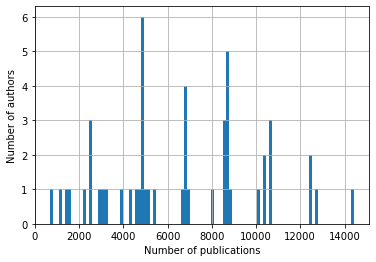

In [36]:
#determine the productivity
import matplotlib.pyplot as plt

plt.figure()
plt.hist(df_publications['author'].value_counts(), bins=100)
plt.grid('both')
plt.xlabel("Number of publications")
plt.ylabel("Number of authors")

## Hitogram with publication waiting times
- Why? -> To derive holiday periods and the like

Text(0.5, 0, 'Days since last publication')

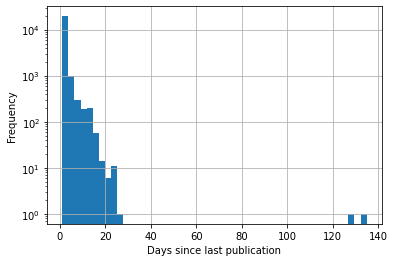

In [37]:
# Remember that 0 means that it was the first entry
at_least_hours = 24
plt.figure()
df_publications[df_publications["time_since_pub"] > pd.Timedelta(hours=at_least_hours)]['time_since_pub'].astype('timedelta64[D]').plot.hist(bins=50, log=True, grid='both')
plt.xlabel('Days since last publication')

In [46]:
df_publications[df_publications["time_since_pub"] > pd.Timedelta(days=80)].head()

,link,author,date,time,datetime,Name,Surname,time_since_pub
60825,https://jdestefani.github.io/SEN163A-TabularRa...,Marthe Hale,2013-08-05,09:17,2013-08-05 09:17:00,Marthe,Hale,127 days 15:29:00
257822,https://jdestefani.github.io/SEN163A-TabularRa...,Corrine Gallop,2018-02-26,09:46,2018-02-26 09:46:00,Corrine,Gallop,135 days 16:35:00


In [38]:
###Productivity over time

#plot of the productivity of an employee over time
#select a handful of employees that represent the dataset


# TODO LIst
